In [44]:
import pandas as pd
from sklearn import model_selection, preprocessing
from sklearn import tree, linear_model, svm, ensemble, metrics
import matplotlib
from matplotlib import pyplot as plt
import xgboost as xgb
import scipy
import numpy as np

import compare_y
import cross_validation_result as cvr
import ML_helper

%matplotlib inline

In [188]:
TRUTH = "../psl/data/simulation/{0}/seed0/cross_val_6fold/"
INFER = "../psl/result/simulation/{0}/{1}/"
MATRIX = "../data/similuated_matrix_{0}.tsv"

results = {"mse": {"mean": pd.DataFrame(index=["linear", "random"]), 
                   "error": pd.DataFrame(index=["linear", "random"])}, 
           "rho": {"mean": pd.DataFrame(index=["linear", "random"]), 
                   "error": pd.DataFrame(index=["linear", "random"])}}

for data_type in ["linear", "random"]:
    for PSL_type in ["with_prior", "no_prior"]:
        truth_file = TRUTH.format(data_type)
        infer_file = INFER.format(data_type, PSL_type)
        PSL_accus = cvr.cross_val_result(truth_file, infer_file)
        for accu_type, accu in {"mse": PSL_accus[0], "rho": PSL_accus[1]}.iteritems():
            results[accu_type]["mean"].set_value(data_type, "PSL_" + PSL_type, np.mean(accu))
            results[accu_type]["error"].set_value(data_type, "PSL_" + PSL_type, np.std(accu))
    matrix_file = MATRIX.format(data_type)
    X, Y = ML_helper.load_data(matrix_file)
    X = preprocessing.PolynomialFeatures(2).fit_transform(X)
    ML_accus = ML_helper.run_cross_val(X, Y, Classifiers, n_fold=6)
    for accu_type, accu in {"mse": ML_accus[0], "rho": ML_accus[1]}.iteritems():
        for algo in ["Linear", "XGBoost"]:
            results[accu_type]["mean"].set_value(data_type, algo, accu[algo].mean())
            results[accu_type]["error"].set_value(data_type, algo, accu[algo].std())

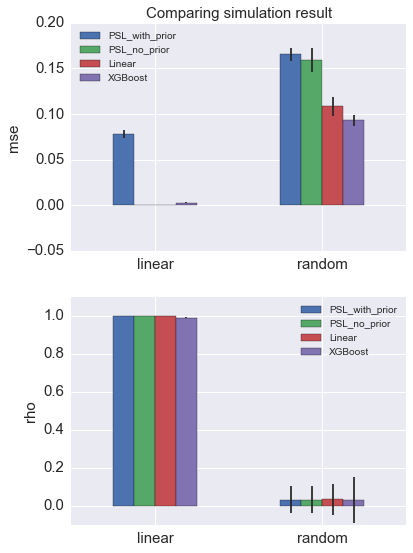

In [190]:
# plotting
f, ax = plt.subplots(2, 1, figsize=(6,9))
ylims = {0: (-0.05,0.2), 1:(-0.1, 1.1)}
for idx, accu_type in enumerate(["mse", "rho"]):
    results[accu_type]["mean"].plot.bar(ax=ax[idx], yerr=results[accu_type]["error"], 
                                        ylim=ylims[idx], fontsize=15, rot=0)
    ax[idx].set_ylabel(accu_type, fontsize=15)
ax[0].set_title("Comparing simulation result", fontsize=15)